<a href="https://colab.research.google.com/github/Staticstic/Data-Analysis-practice/blob/main/%ED%94%8C%EB%A0%88%EC%9D%B4%EC%8A%A4%ED%86%A0%EC%96%B4_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 플레이 스토어 데이터 분석
***

In [ ]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [ ]:
#AppleGothic (한글 글씨체 나눔고딕 다운로드)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
plt.rc('font',family="NanumBarunGothic")

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 0s (36.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122541 files and dir

In [ ]:
df = pd.read_csv("/lineage.csv")
df = df.drop(['Unnamed: 0'], axis = 1)

# 데이터 전체 확인
***

In [ ]:
#행과열을 확인
df.shape

(5320, 8)

In [ ]:
#데이터 정보 확인
df.info()

# 숫자 : int / float (소숫점 형태)
# 문자 : object (string)
# 날짜 : datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5320 entries, 0 to 5319
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         5320 non-null   int64 
 1   date       5320 non-null   int64 
 2   dateYear   5320 non-null   int64 
 3   dateMonth  5320 non-null   int64 
 4   dateDay    5320 non-null   int64 
 5   rating     5320 non-null   int64 
 6   userName   5320 non-null   object
 7   content    5320 non-null   object
dtypes: int64(6), object(2)
memory usage: 332.6+ KB


In [ ]:
df.head()

,id,date,dateYear,dateMonth,dateDay,rating,userName,content
0,1,20180930,2018,9,30,5,Google 사용자,원작이 명불허전이었다면 완벽한 보완으로 원작에 이름을 뛰어넘은 명작. 급변하는 생...
1,2,20210310,2021,3,10,1,Google 사용자,아이템 좋은거 주워서 강화 잘 띄워도 현질 없이는 만년하꼬바리 중립깡통캐릭 이상 못...
2,3,20181113,2018,11,13,3,Google 사용자,순간이동 문제점 퀘스트로 순간이동 하는거!! 그거좀 수정 건의드려요 순간이동 주문서...
3,4,20200530,2020,5,30,1,이구역의미친놈,처음 입문하시는 분들은 다른 고인물에게 죽지 않도록 현질을 많이 해 장비를 맞추고 ...
4,5,20210612,2021,6,12,1,좋은하루,이 게임에 미래는 없습니다. 새로 하실분들은 뒤로 가기 눌러서 다른 게임 찾아보세요...


In [ ]:
df.describe(include="object")

,userName,content
count,5320,5320
unique,2843,5319
top,Google 사용자,감사합니다.♡♡
freq,2391,2


In [ ]:
df.describe()

,id,date,dateYear,dateMonth,dateDay,rating
count,5320.000000,5.320000e+03,5320.000000,5320.000000,5320.000000,5320.000000
mean,2660.500000,2.020099e+07,2020.029323,6.809962,16.149248,2.006955
std,1535.896047,1.341754e+04,1.351917,3.343495,8.889278,1.567120
min,1.000000,2.018091e+07,2018.000000,1.000000,1.000000,1.000000
25%,1330.750000,2.019043e+07,2019.000000,4.000000,8.000000,1.000000
50%,2660.500000,2.020073e+07,2020.000000,7.000000,16.000000,1.000000
75%,3990.250000,2.021072e+07,2021.000000,10.000000,24.000000,3.000000
max,5320.000000,2.023061e+07,2023.000000,12.000000,31.000000,5.000000


# 파생변수
***

In [ ]:
df['game'].unique()

array(['던전앤파이터 모바일', '메이플스토리 m', '바람의나라 연', '카트라이더 러쉬플러스', '피파 모바일',
       '블루아카이브', '프라시아 전기', '카트라이더 드리프트'], dtype=object)

In [ ]:
# 게임 별 리뷰 수 파생 변수 생성
df["리뷰수"]=df.content.apply(lambda x:len(x))

In [ ]:
df.head()

,id,date,dateYear,dateMonth,dateDay,rating,userName,content,리뷰수
0,1,20180930,2018,9,30,5,Google 사용자,원작이 명불허전이었다면 완벽한 보완으로 원작에 이름을 뛰어넘은 명작. 급변하는 생...,195
1,2,20210310,2021,3,10,1,Google 사용자,아이템 좋은거 주워서 강화 잘 띄워도 현질 없이는 만년하꼬바리 중립깡통캐릭 이상 못...,168
2,3,20181113,2018,11,13,3,Google 사용자,순간이동 문제점 퀘스트로 순간이동 하는거!! 그거좀 수정 건의드려요 순간이동 주문서...,162
3,4,20200530,2020,5,30,1,이구역의미친놈,처음 입문하시는 분들은 다른 고인물에게 죽지 않도록 현질을 많이 해 장비를 맞추고 ...,234
4,5,20210612,2021,6,12,1,좋은하루,이 게임에 미래는 없습니다. 새로 하실분들은 뒤로 가기 눌러서 다른 게임 찾아보세요...,154


# 전체 게임 데이터 분석
***

In [ ]:
#게임 별 분포 확인
df['game'].value_counts().to_frame()

,game
블루아카이브,8776
피파 모바일,6840
카트라이더 드리프트,4586
프라시아 전기,4200
카트라이더 러쉬플러스,3920
바람의나라 연,1760
메이플스토리 m,1600
던전앤파이터 모바일,794


In [ ]:
game_star=df.groupby('game')['rating'].mean().to_frame().reset_index()
game_star

,game,rating
0,던전앤파이터 모바일,4.062972
1,메이플스토리 m,2.725625
2,바람의나라 연,2.189773
3,블루아카이브,3.710232
4,카트라이더 드리프트,3.135194
5,카트라이더 러쉬플러스,3.584439
6,프라시아 전기,3.992619
7,피파 모바일,2.752924


Text(0, 0.5, '평점')

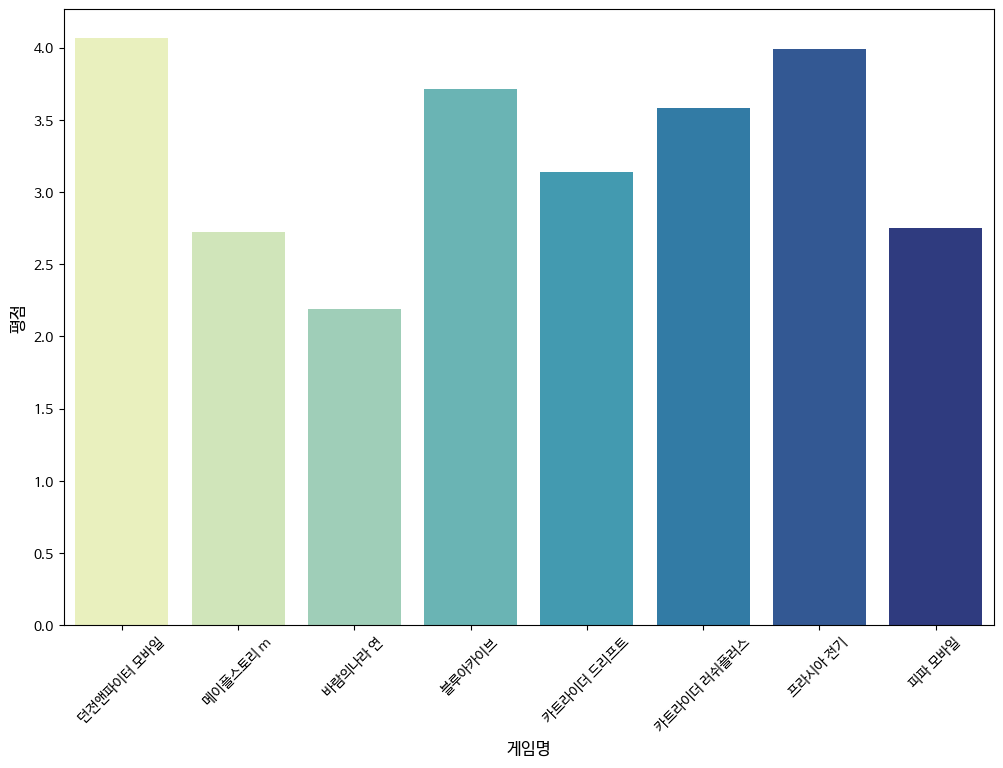

In [ ]:
plt.figure(figsize=(12, 8))
plt.xticks(rotation=45)
g_p=sns.barplot(x="game", y="rating", data=game_star,  palette='YlGnBu')
g_p.set_xlabel("게임명", fontsize = 12)
g_p.set_ylabel("평점", fontsize = 12)

In [ ]:
# round(숫자,자릿수) : 자릿수 까지 남기고 다음 자릿수에서 반올림한다.

# {0} , {1} .format(1,2)
# %s : 문자 %d :정수 %f : 실수 , %(값)

print("전체 게임 평균 평점 {0}".format(round(df["rating"].mean(),2)))
print("전체 게임 평균 평점 %f "%(round(df["rating"].mean(),2)))

전체 게임 평균 평점 3.33
전체 게임 평균 평점 3.330000 


## 긍정 데이터 / 부정 데이터 비율 확인

In [ ]:
df.groupby('game')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
game,,,,,,,,
던전앤파이터 모바일,794.0,4.062972,1.490978,1.0,3.0,5.0,5.0,5.0
메이플스토리 m,1600.0,2.725625,1.584507,1.0,1.0,3.0,4.0,5.0
바람의나라 연,1760.0,2.189773,1.550480,1.0,1.0,1.0,3.0,5.0
블루아카이브,8776.0,3.710232,1.728597,1.0,1.0,5.0,5.0,5.0
카트라이더 드리프트,4586.0,3.135194,1.739162,1.0,1.0,3.0,5.0,5.0
카트라이더 러쉬플러스,3920.0,3.584439,1.369486,1.0,3.0,4.0,5.0,5.0
프라시아 전기,4200.0,3.992619,1.469283,1.0,3.0,5.0,5.0,5.0
피파 모바일,6840.0,2.752924,1.653774,1.0,1.0,3.0,4.0,5.0


In [ ]:
positive_review=df[df["rating"]>3]
negative_review=df[df["rating"]<=3]

In [ ]:
len(positive_review)

17685

In [ ]:
len(negative_review)

14791

In [ ]:
df["rating_posneg"]=df.rating.apply(lambda x: "pos" if x>3 else "neg")

In [ ]:
print("게임 긍정 평가 평균 평점 {0}".format(round(positive_review["rating"].mean(),2)))
print("게임 부정 평가 평균 평점 {0}".format(round(negative_review["rating"].mean(),2)))

게임 긍정 평가 평균 평점 4.77
게임 부정 평가 평균 평점 1.6


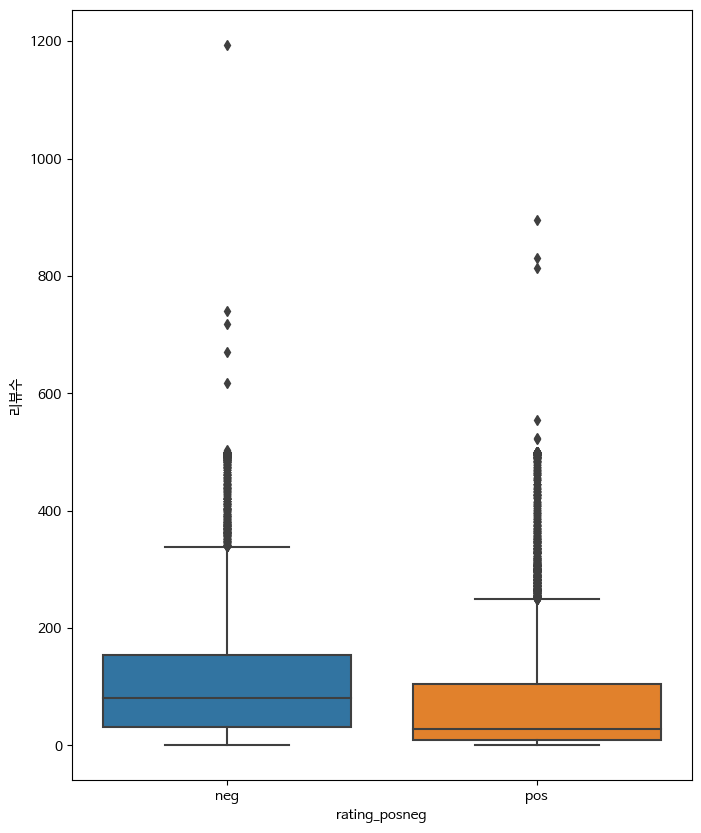

In [ ]:
plt.figure(figsize=(8,10))
sns.boxplot(y = "리뷰수", x="rating_posneg",data =df)
plt.show()

# 시간 별 데이터 분석
***

In [ ]:
def data_groupby_time(column_name):
  data_all=df.groupby(column_name).count().reset_index()[[column_name,"content"]]
  return data_all

In [ ]:
df

,id,date,dateYear,dateMonth,dateDay,rating,userName,content,game,리뷰수,rating_posneg
0,0,20230408,2023,4,8,1,뇌세포,결장 밸런스 좀 잡아라. 버서커는 슈퍼 아머 떡칠에 쿨도 짧고 데미지도 쎄고 범위도...,던전앤파이터 모바일,360,neg
1,1,20230313,2023,3,13,1,허정선,축하합니다! 전체적으로 여론 나락이여서 1주년 행사에서 띵진이형 모셔와도 시원하게 ...,던전앤파이터 모바일,299,neg
2,2,20220324,2022,3,24,1,웨옹,성인인증 오류뜨는것도 오류인데... 게임 시작하려고 서버 로그인 하면 계속 로그인중...,던전앤파이터 모바일,264,neg
3,3,20230124,2023,1,24,5,김강민,던파를 처음 해보는데 진짜 너무 재밌네요 레어 아바타도 공짜로 주고 진짜 개꿀잼 아...,던전앤파이터 모바일,78,pos
4,4,20230105,2023,1,5,4,송하윤,12세 던파에도 경매장이나 경매장을 대신할 시스템을 추가해주시면 감사하겠습니다.기존...,던전앤파이터 모바일,69,pos
...,...,...,...,...,...,...,...,...,...,...,...
32471,32471,20230110,2023,1,10,3,엘리트ELITE,몰루,카트라이더 드리프트,2,neg
32472,32472,20230110,2023,1,10,5,카모꿀,👍,카트라이더 드리프트,1,pos
32473,32473,20230110,2023,1,10,5,사공현주,👍,카트라이더 드리프트,1,pos
32474,32474,20230110,2023,1,10,5,이태영,👍,카트라이더 드리프트,1,pos


In [ ]:
day_table=data_groupby_time("dateDay")
month_table=data_groupby_time("dateMonth")
year_table=data_groupby_time("dateYear")

<Axes: xlabel='dateDay', ylabel='content'>

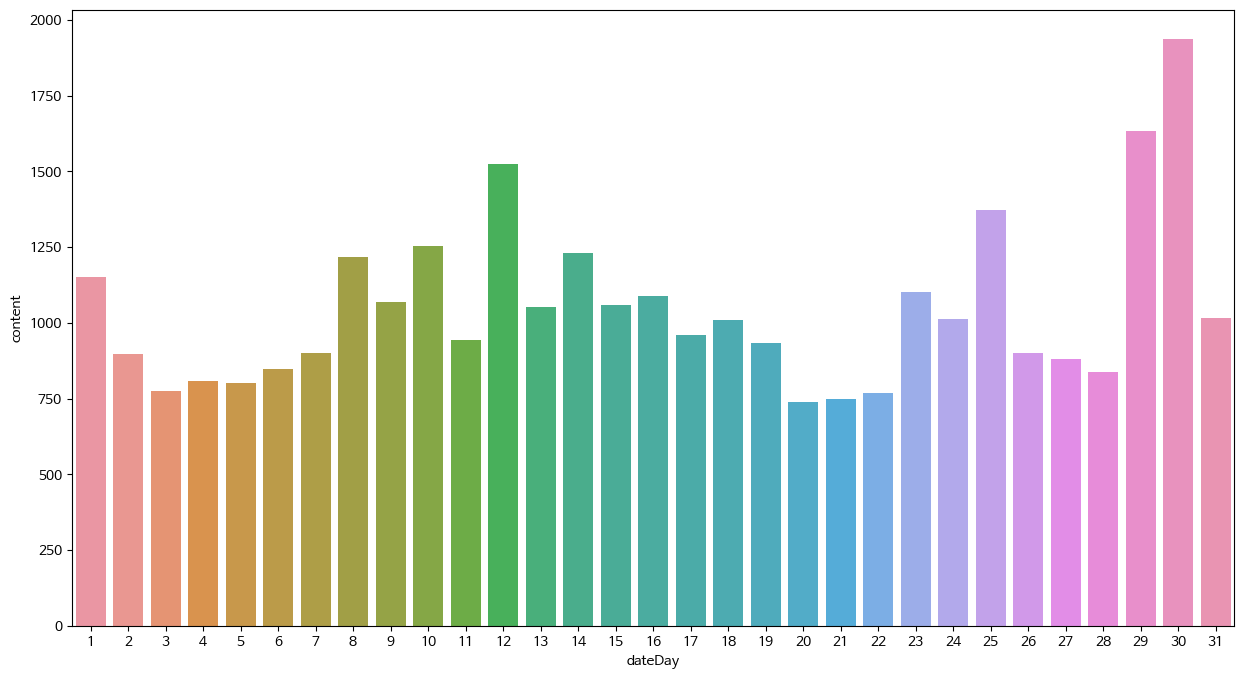

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x="dateDay", y="content",data=day_table)

<Axes: xlabel='dateMonth', ylabel='content'>

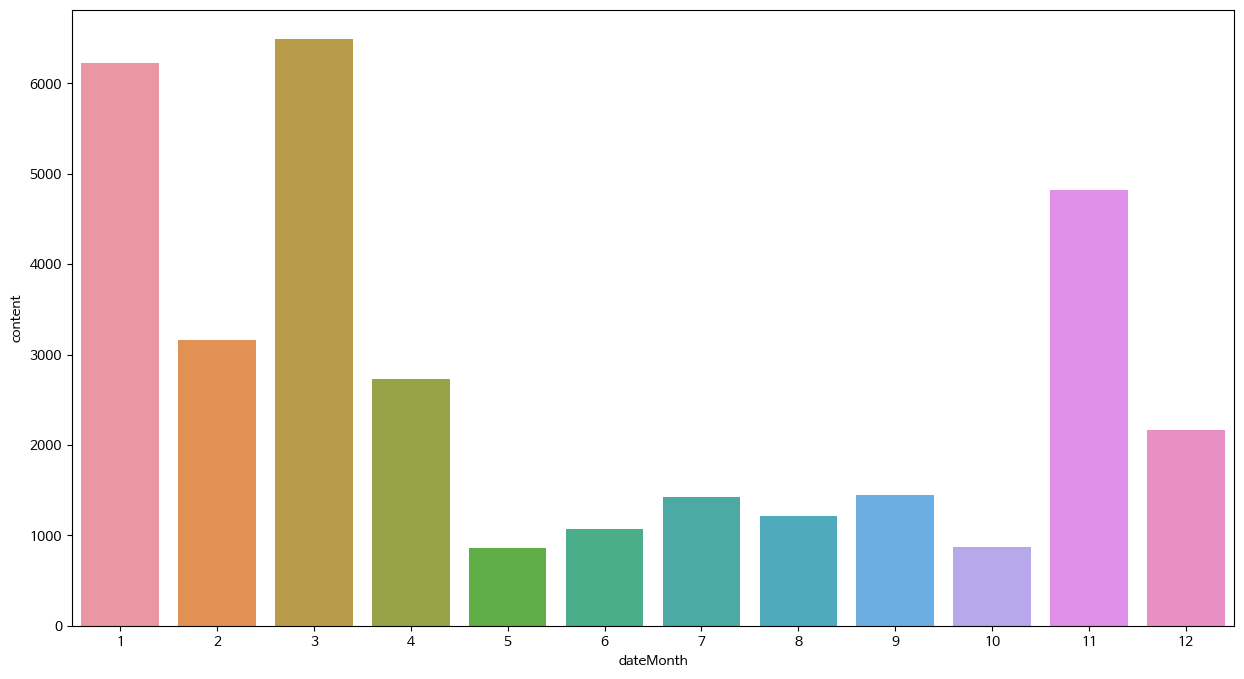

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x="dateMonth", y="content",data=month_table)

<Axes: xlabel='dateYear', ylabel='content'>

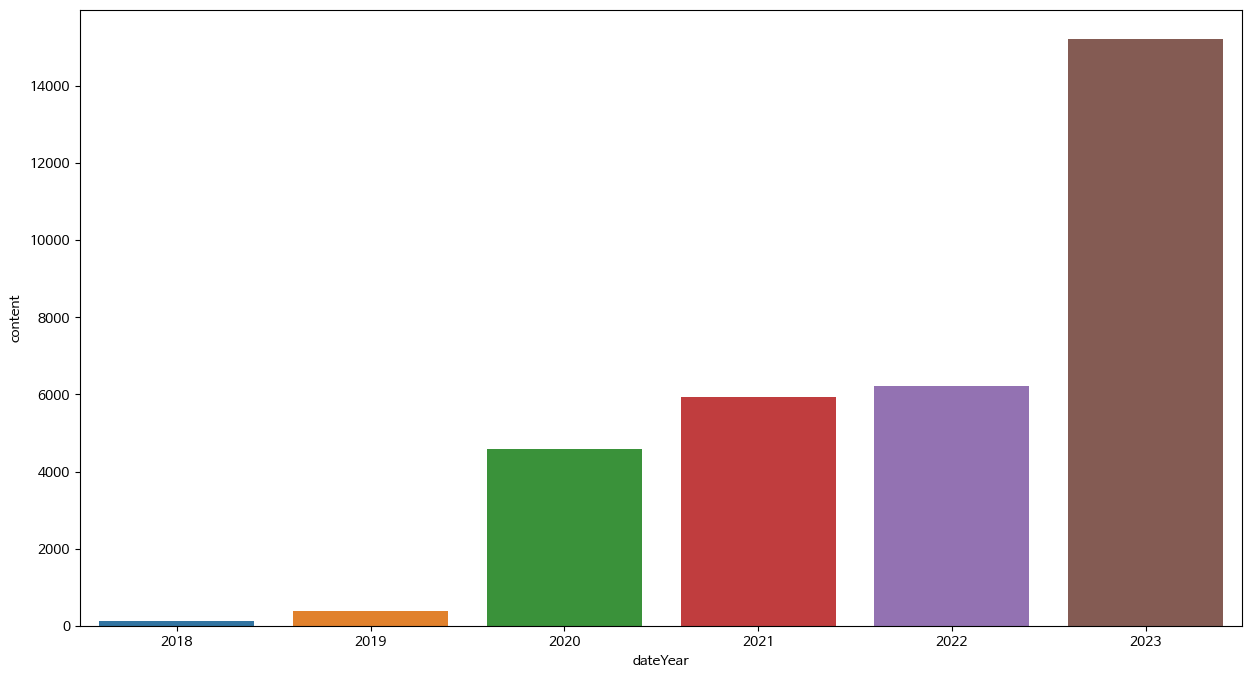

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x="dateYear", y="content",data=year_table)

## 닉네임 별 데이터 수
***

In [ ]:
df.groupby("userName").count().reset_index()[["userName","date"]].sort_values(by=["date"],ascending=False).head(10)

,userName,date
1260,Google 사용자,751
6214,ᄋᄋ,85
8528,김민준,28
14536,사람,27
15122,성이름,25
8327,김도현,25
8509,김민성,22
8377,김동현,22
16618,안녕,18
8320,김도윤,18


In [ ]:
# 같은 닉네임을 가지고 있으면 한 유저라고 가정
same_nickname=df.groupby("userName").count().reset_index()[["userName","date"]].sort_values(by=["date"],ascending=False)

In [ ]:
same_nickname

,userName,date
1260,Google 사용자,751
6214,ᄋᄋ,85
8528,김민준,28
14536,사람,27
15122,성이름,25
...,...,...
9020,김영한,1
9019,김영태,1
9018,김영탁,1
9016,김영채,1


In [ ]:
str(round(len(same_nickname[same_nickname["date"]>1])/len(df)*100,2))+"%"

'8.29%'

In [ ]:
same_nickname.head()

,userName,date
1260,Google 사용자,751
6214,ᄋᄋ,85
8528,김민준,28
14536,사람,27
15122,성이름,25


In [ ]:
df[df["userName"]=="김민준"][["rating","content","game"]]

,rating,content,game
355,5,던파 첨해보는데 재밌네요,던전앤파이터 모바일
4299,3,게임 자체는 재미있습니다.하지만 게임을 플레이하다 보면 오른쪽으로 가려고 오른쪽 방...,카트라이더 러쉬플러스
5105,3,재미는 있다만 과금러와 무과금러의 차이가 상당한 편이고 랭킹전 같은 점수로 인한 모...,카트라이더 러쉬플러스
6840,4,안녕하세요 카러플을 즐겨하고 있는 유저 입니다 다름이 아니라 제가 타임어택을 즐겨 ...,카트라이더 러쉬플러스
7928,1,제가 예전이 지웠다가 다시 설치를 하려고 하는데 저장공간이 8GB나 남아있음에도 계...,카트라이더 러쉬플러스
9537,5,일단 퍼주는것이 많고 게임도 거의 뭐 실력겜이라 무과금도 재밌게 할 수 있습니다.,피파 모바일
10297,5,재미있데 랙이좀 걸리네요. 그래도 재미있게잘하고있습니다.,피파 모바일
11037,1,조규성 팩에 넣을수 있게해주세요 진짜 너무 불편해요 진짜 이번 한번만 부탁합니다 진...,피파 모바일
11076,1,공격모드하는데 제 오버롤이138인데 145가 넘는사람이 잡히는데 밸런스조정이 아예 ...,피파 모바일
11769,1,ㅋ 아니 ai가.. 침투를 할때가 있고 안할 때가 있고 뭐 컨디션뽕인가여;; 체력 ...,피파 모바일


#워드클라우딩

In [ ]:
pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 64.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 36.4 MB/s eta 0:00:00


In [ ]:
# *- encoding: utf-8 -*- 패키지 불러오는 작업
import json
import ast
import sys
import re #정규 표현식 가지고 오는 패키지
from konlpy.tag import Twitter
from konlpy.tag import Komoran
from konlpy.tag import Kkma

In [ ]:
# 토큰화 : 쪼개는거
# 태깅 : 명사 , 동사 구분해주는 것  ( 명사,동사 or 명사 형용사)
# 빈도
# 어린왕자 : 8 , 떡 : 10 ,
# 글씨크기가 달라지고 - > 워드 클라우드

In [ ]:
game=df[df['game']=='카트라이더 드리프트']

In [ ]:
game_data_text=df["content"].tolist()

In [ ]:
#tokenizer-> 쪼갤거에요 word 토큰화
#pos tagging 다양하게 -> okt, kkma, mecab 다양하게 있었어요 , -> okt 트위터 할꺼에요
#pos tagging -> pos (품사), tagging(붙여주는 )
#stop word ->

ff=open('텍스트데이터.txt','w')

from konlpy.tag import Okt
okt=Okt() #함수 이름 새롭게 정의
documents1=[]

# def : 함수 선언

# 안녕하세요 저는 머신러닝 입니다.
# 저 는 머신러닝 입니다. => 저 noun 는 josa  okt.pos 일
# 안녕하세요 ㅋㅋㅋㅋㅋ 반갑습니다 -> 안녕하세요 반갑습니다.
# 바뀌는 바뀌다 바뀔까 바뀌네 -> 바꾸다.

# 안녕하세요 저는 머신러닝 입니다
# 안녕 하세요 저 는 머신 러닝 입니다.

# 은 는 이 가 -> 1글자 -> 빼고 들고올거임


def tokenizer(raw, pos=["Noun"], stopword=["게임", "진짜", "메이플", "모바일", "있다", "없다", "같다", "이다", "다시", "캐릭터"]):
    return [
        word for word, tag in okt.pos( #okt.pos 태깅을 해서 word  사람 tag Adverb
            raw,
            norm=True,   # normalize 그랰ㅋㅋ -> 그래ㅋㅋ
            stem=True    # stemming 바뀌나->바뀌다
            )
            if len(word) > 1 and tag in pos and word not in stopword
        ]

documents1=tokenizer(str(game_data_text))
print(documents1)

for b in range(0,len(documents1)):
    fb=documents1[b]
    ff.write('%s \n'%fb)

ff.close()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# pos tagging, tag 종류 확인
# Adjective Noun Verb 주로 사용
okt.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [ ]:
import csv, sys
import numpy as np
# tf , tf-idf -> sklearn tf -> countVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

In [ ]:
openFileName = '텍스트데이터.txt'

f = open(openFileName, 'r')
data = f.read()
f.close()

In [ ]:
data = [data]
vectorize = CountVectorizer()
X = vectorize.fit_transform(data)

In [ ]:
freqs = [(word, X.getcol(idx).sum()) for word, idx in vectorize.vocabulary_.items()]

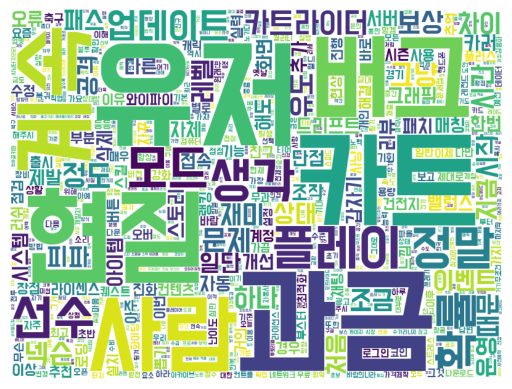

In [ ]:
from wordcloud import WordCloud

w=WordCloud(font_path='BMDOHYEON_ttf.ttf', width=800,height=600,mode='RGBA',background_color='white',max_words=1000).fit_words(dict(freqs))

import matplotlib.pyplot as plt
%matplotlib inline
plt.axis('off')
plt.imshow(w)
#plt.axis(&quot;off&quot;)

plt.show()

마스크 적용하기

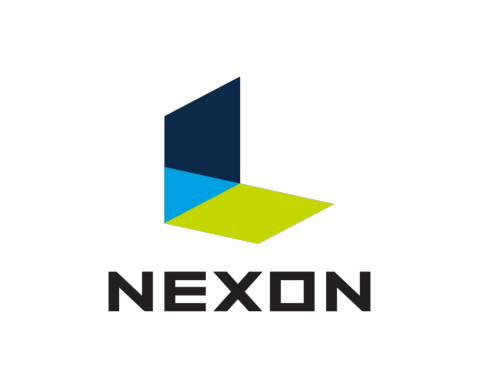

In [ ]:
from PIL import Image
icon = Image.open('/content/Corporate CI_세로.png').convert("RGBA")
plt.axis('off')
plt.imshow(icon)

mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)


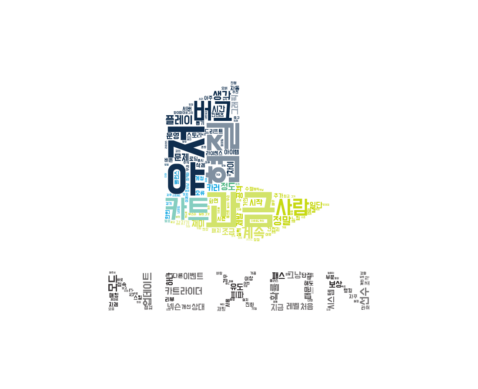

In [ ]:
from wordcloud import ImageColorGenerator
wc = WordCloud(font_path='BMDOHYEON_ttf.ttf',   #폰트
               background_color='white',        #배경색
               width=800, height=600 ,          #사이즈설정
               max_words=200,                   #단어갯수
               mask=mask).fit_words(dict(freqs))

plt.axis('off')                                                       #테두리 선 없애기
plt.imshow(wc)

image_colors = ImageColorGenerator(mask)
plt.imshow(wc.recolor(color_func=image_colors),interpolation="bilinear")

In [ ]:
# 긍부정 -> 워드클라우드
# 게임 별 -> 워드클라우드
# 리뷰수가 많은 애들 -> 워드클라우드
# 명사 -> 형용사 , 동사 바꿔나가면서 유저 파악
# TFIDF / COUNT VECTORIZER 가 다른것들을 파악